# TP1 - Redes Neuronales II
## Francisco Mendizabal, legajo 61454

## Consignas:

### 1- Usar las vectorizaciones disponibles en sklearn de CountVectorizer y TfidfVectorizer para construir la matriz de documento-término. Esto proveerá de embeddings para cada documento. Con esta vectorización explorar similaridad entre documentos (tomar algún documento y evaluar los documentos correspondientes con mayor similaridad), dado que el dataset provee también clasificación anotada en tópicos se aprovechar esta clasificación como elemento extra para comprobar la similaridad de documentos. Explorar vectorizar con diferentes cantidades de n-gramas. Toda exploración adicional a las mencionadas es bienvenida.

### 2- Repetir la exploración de similaridad de documentos pero utilizando la vectorización resultante de aplicar truncated SVD (disponible en sklearn) a la matriz de documento-término.

### 3- Transponer la matriz documento-término, esto resultará en la matriz término-documento que provee embeddings de palabras. Explorar similaridad entre términos.

## Pasos a seguir:
### 1) Primero se probaron CountVectorizer y TFIDF con diferentes parámetros.
### 2) Luego se utilizó un caso cualquiera del item 1, con el fin de añadir TruncatedSVD y modificar el parámetro n_components.
### 3) Finalmente se graficó un set de palabras cercanas en el mapa donde se ubican espacialmente todas las palabras del dataset.

In [154]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import numpy as np

<img src="tf.png" >
<img src="idf.png" >
<img src="tfidf.png" >

In [2]:
TNG_train = fetch_20newsgroups(subset="train", remove=('headers', 'footers', 'quotes'))

In [3]:
cv = CountVectorizer(ngram_range=(1,2), max_df=0.8, min_df=2e-4, max_features=None, stop_words="english")
#cv = TfidfVectorizer(ngram_range=(1,1), max_df=0.8, min_df=2e-4, max_features=None, stop_words="english")

In [35]:
# Configuro si quiero TruncatedSVD o no
SVD = False

In [36]:
TNG_cv = cv.fit_transform(TNG_train.data)
if SVD:
    red = TruncatedSVD(n_components=300)
    TNG_cv_red = red.fit_transform(TNG_cv)
    print(TNG_cv_red.shape)
else:
    print(TNG_cv.shape)

(11314, 62739)


In [37]:
#Tamaño del vocabulario
print(f'El tamaño del vocabulario es: {len(cv.get_feature_names_out())}')

El tamaño del vocabulario es: 62739


### Cálculo del Document Frecuency de cada palabra

In [38]:
TNG_train.data[0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

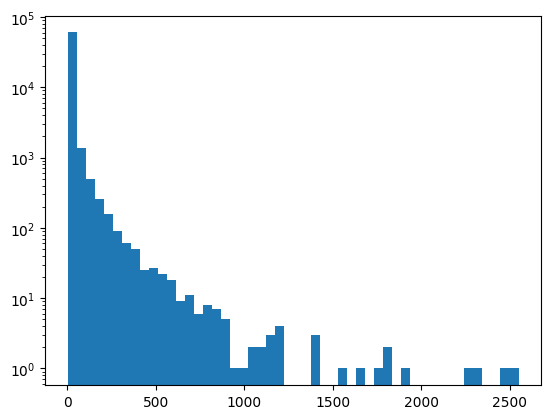

In [39]:
if not SVD:
    doc_freq = np.array(TNG_cv.astype(bool).sum(axis=0)).flatten()
    plt.hist(doc_freq, bins=50, log=True)
    plt.show()

In [40]:
if SVD:
    np.linalg.norm(TNG_cv_red, axis=0)
else:
    np.linalg.norm(TNG_cv.todense(), axis=0)

In [41]:
if SVD:
    TNG_norm = (TNG_cv_red.T/(np.linalg.norm(TNG_cv_red, axis=-1)+1e-8)).T
else:
    TNG_norm = (TNG_cv.toarray().T/(np.linalg.norm(TNG_cv.toarray(), axis=-1)+1e-8)).T

print(TNG_norm.shape)

In [43]:
TNG_train.data[2727]

'\n\nThe Bible does tell us that governments are ordained by God (Romans 13).\n And furthermore, God foreknows everything that would happen.  It is\njust to difficult for humans to graps with our limited minds, the\ninevitablity of the sucess of God\'s plan, and this is especially hard to\ngrasp when we see governemnts doing evil.  However, though they are\ndoing evil (and we should not cooperate with them when they do such), it\nmust be understood that what happens is what God wanted so as to lead to\nthe final sucess of His plan to save as many souls from hell as is\npossible.  In short, the slaughter in Bosnia, though deplorable in the\neyes of God (maybe, then again, they might be getting their just deserts\nnow rather than later; there are plenty of examples of God killing\npeople for their sins - Onan in the Old Testmament for example, and\nAnnias and Spahira in the New) is what he willed to happen so that His\nplan might be accomplished.\n    But don\'t forget, it is not unbibli

In [44]:
cosines = np.dot(TNG_norm[2727], TNG_norm.T)
print(cosines)

In [45]:
max(cosines)

0.9999999991731019

In [47]:
neigh_idx = np.array(cosines).flatten().argsort()[::-1]

In [48]:
# Se observaron las diferentes categorias existentes
TNG_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [49]:
for idx in neigh_idx[0:9]:
    print(f'Documento N° {idx} \n  Clase: \t{TNG_train.target_names[TNG_train.target[idx]]} \n  Similitud: \t{cosines[idx]}')

Documento N° 2727 
  Clase: 	soc.religion.christian 
  Similitud: 	0.9999999991731019
Documento N° 5559 
  Clase: 	soc.religion.christian 
  Similitud: 	0.5154634370411779
Documento N° 6962 
  Clase: 	soc.religion.christian 
  Similitud: 	0.49973990384877204
Documento N° 5826 
  Clase: 	soc.religion.christian 
  Similitud: 	0.49533589249012616
Documento N° 10571 
  Clase: 	talk.religion.misc 
  Similitud: 	0.46721039063516945
Documento N° 10649 
  Clase: 	soc.religion.christian 
  Similitud: 	0.4459054287219445
Documento N° 6951 
  Clase: 	soc.religion.christian 
  Similitud: 	0.4351314498695552
Documento N° 3793 
  Clase: 	talk.religion.misc 
  Similitud: 	0.4300756149018942
Documento N° 10466 
  Clase: 	soc.religion.christian 
  Similitud: 	0.41698559765173654


### 1) Se calculó la similitud coseno en los casos que se indican en cada celda de las tablas, partiendo como referencia del archivo 2727.
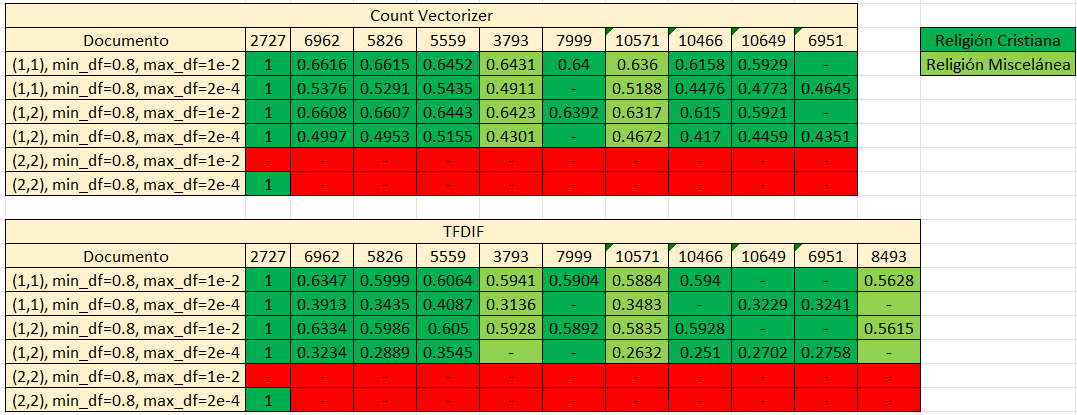
### Se observó que cambios en el max_df no eran significativos, ya que ninguna palabra aparecía con tanta regularidad. Por otra parte, las modificaciones del min:df cambiaban radicalmente el tamaño de la matríz término documento. Cuando se utilizaba el valor de 1e-2, el resultado era que se recortaban demasiadas palabras, lo cual dificultaba la diferenciación de los textos (lo cual produce similitudes más elevadas). El valor de 2e-4 conseguía esto de una mejor manera, pero el costo computacional era mucho mayor.
### La utilización de bigramas no presentó mejorar sustanciales en comparación a los unigramas. Por otro lado, los unigramas resultan esenciales por sí mismos, ya que en los casos donde no se utilizaron, la mayoría de los textos obtenidos ni siquiera coincidían con la categoría del texto original.

### 2) Para analizar el SVD, se partió de el caso con CV (1,2) con max_df=2e-4, y el único parámetro que se modificó fue n_components.
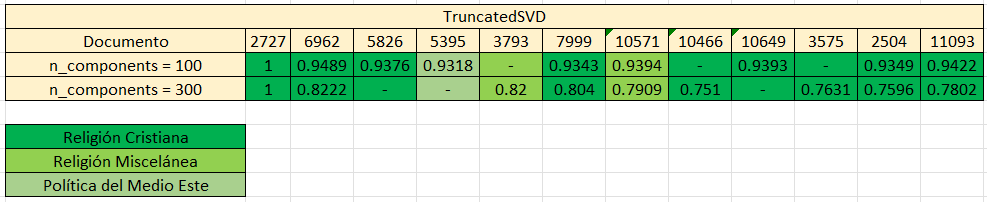
### En el caso con menos componentes, vemos que no se distinguen demasiado los archivos, ya que las similitudes son demasiado altas, e incluso aparecen documentos de temas con menor relación al tópico del documento original.

## Test de Similitud

In [108]:
red = TruncatedSVD(n_components=300)
TNG_cv_red = red.fit_transform(TNG_cv.T)

In [115]:
#TNG_norm = (TNG_cv_red.T/(np.linalg.norm(TNG_cv_red, axis=-1)+1e-8)).T
#cosines = np.dot(TNG_norm[27270], TNG_norm.T)
#print(cosines)
#print(max(cosines))

[-0.00289435  0.00478332  0.00280258 ... -0.00630571 -0.02065847
  0.00476574]
0.9999999313335417


In [109]:
neigh = NearestNeighbors(n_neighbors=20, metric="cosine")

In [110]:
neigh.fit(TNG_cv_red)

NearestNeighbors(metric='cosine', n_neighbors=20)

In [150]:
# Aquí se puede cambiar la palabra a partir de la cual se buscarán los vecinos
key = cv.get_feature_names_out()[50210]
print(key)

semper


In [151]:
idx_1 = cv.vocabulary_[key]
_, neig = neigh.kneighbors(TNG_cv_red[idx_1:idx_1+1])

In [152]:
for n in neig[0]:
    print(cv.get_feature_names_out()[n])

semper fi
semper
punch holes
bd did
nut case
safety children
nutcase
fbi spokesman
today instead
did fbi
outside compound
cs gas
batf fbi
news reported
like koresh
mass suicide
gas compound
did check
did new
fbi batf


In [ ]:
X_embedded = TSNE(n_components=2,metric="cosine").fit_transform(TNG_cv_red)
X_embedded.shape

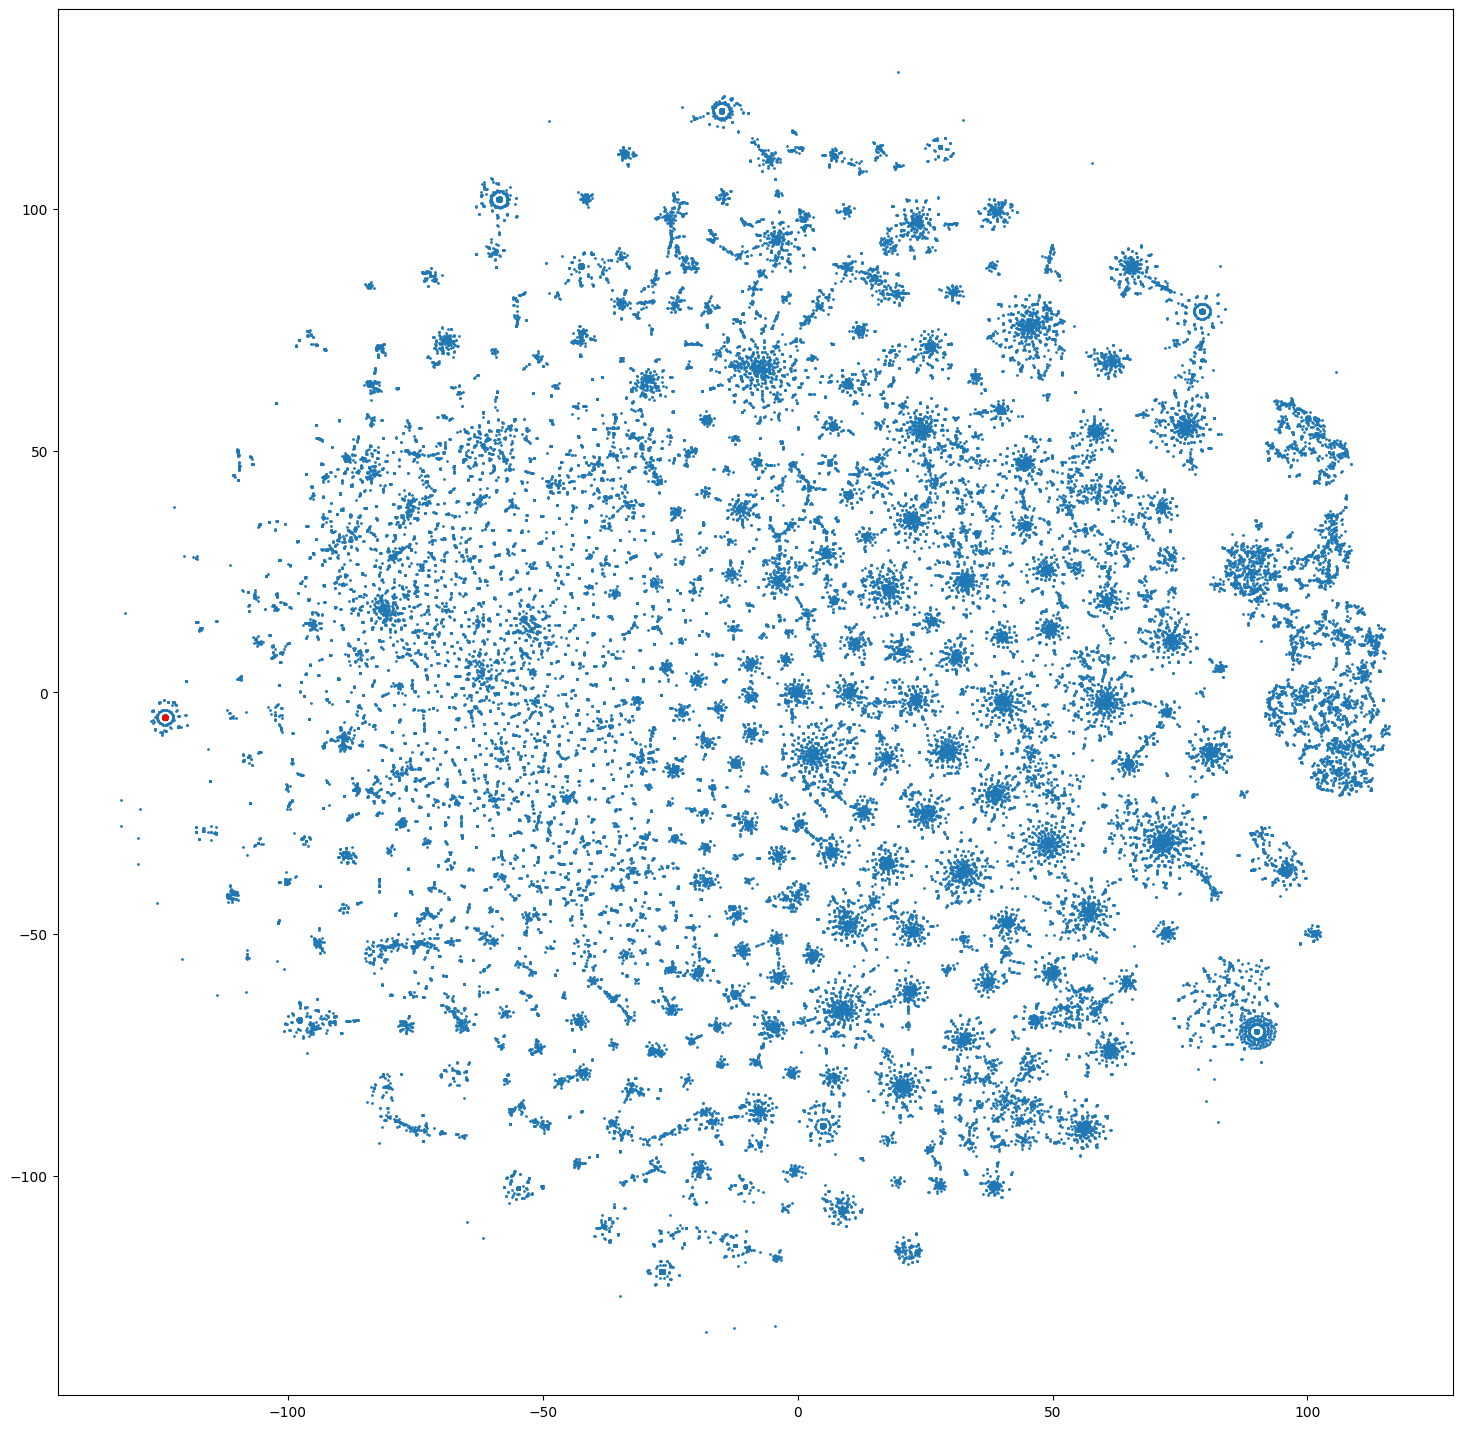

In [ ]:
# Se grafican en rojo las palabras cercanas, obtenidas en los bloques anteriores
plt.figure(figsize=[18,18])
plt.scatter(X_embedded[:,0],X_embedded[:,1], s=1)
words=[cv.get_feature_names_out()[i] for i in neig[0]]
for word in words:
    idx = cv.vocabulary_[word]
    plt.scatter(X_embedded[idx,0], X_embedded[idx,1], s=1, color='red')